# The Cost Function Lab

## Introduction

In this lesson, let's continue to explore the cost function for logistic regression.  We'll do so in the context of our breast cancer dataset.  We'll write a hypothesis and cost function to begin to train our logistic regression model.

## Our Initial Attempts

Let's start by looking at some of our cancer data.

In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()

X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = pd.Series(data['target'])

X[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Now for this lesson, let's we'll just work with the `mean area`, and we'll try to a functions that can train and predict whether cancer is present, based on this feature of the mean area.  We'll begin by selecting the mean area.

In [8]:
mean_area = X['mean area']
mean_area[:3]

0    1001.0
1    1326.0
2    1203.0
Name: mean area, dtype: float64

And then from there, we can select the first observation: the corresponding feature, and target.

In [23]:
x_0 = mean_area.iloc[0]
y_0 = y.iloc[0]
x_0, y_0

(1001.0, 0)

### Writing the hypothesis function

Now it's time for you to do some of the work.

Write the hypothesis function, `h`, that takes in a value of $x_1$, and a `param` $\theta_1$ as an argument.  It should return values between 0 and 1, where numbers closer to 0 indicate predictions of benign.

> You can see the values it returns below.

In [72]:
import numpy as np
def h(x, param):
    return 1/(1 + np.exp(-x*param))

In [20]:
# x_0 = 1001.0
h(x_0, .001)
# 0.7312551451284902

0.7312551451284902

In [19]:
h(x_0, -.003)
# 0.04729052706233337

0.04729052706233337

Now because $y_0 = 0$, it looks like, based on this one observation, perhaps $\theta_0$ should be closer to $-.003$, than $.001$.

In [22]:
y[0]

0

### Writing the loss function

Now that we've written a hypothesis function that can return different parameters, let's turn to the loss function.  Remember that our log loss function looks like the following:

$J(X) = - \sum y_ilog(p) +  (1-y_i) log (1 - p)  $ 

Later on, we'll translate this function into code.  But for now, just calculate the log loss of our first datapoint give the parameters we provided above. 

> This is the output of the hypothesis function and the corresponding target value.

In [32]:
h(x_0, -.003), y_0

# (0.04729052706233337, 0)

(0, 0.04729052706233337)

> Calculate the loss for this first observation, given $\theta_1 = -.003$, below. 

In [33]:
l_1 = -np.log(1 - h(x_0, -.003))
l_1

0.048445277065277174

> Calculate the loss for this first observation, given $\theta_1 = .001$, below. 

In [35]:
l_2 = -np.log(1 - h(x_0, .001))
l_2
# 1.3139928443876756

1.3139928443876756

Now translate our log loss equation into code.  It should take the feature value of an observation $x$, a parameter, and y as arguments.  It will return the corresponding loss for that observation, provided that parameter $\theta_1$.  

In [37]:
def logistic_loss(X, param, y):
    return -(y*np.log(h(X, param)) + (1 - y)*np.log(1 - h(X, param)))

In [41]:
param = .001
logistic_loss(x_0, param, y_0)

# 1.3139928443876756

1.3139928443876756

Now let's try this for multiple observations.  Note that the way we wrote the function, it's not so difficult to calculate the losses for all observations at once.  Here are all of the losses for our data, provided a $\theta_1 = -.003$.

In [57]:
logistic_loss(mean_areas, -.003, y)[:3]
# 0    0.048445
# 1    0.018550
# 2    0.026719
# dtype: float64

0    0.048445
1    0.018550
2    0.026719
dtype: float64

And of course, we should add these up to get the total loss.

Write a function called `total_cost` that calculates the total log loss across all observations.  The arguments it take is a vector $x$, the mean area for each observation, a vector $y$, the corresponding targets, and a coef.  

In [71]:
def total_cost(coef, X, y):
    return np.sum(logistic_loss(X, coef, y))

In [61]:
total_cost(mean_areas, -.003, y)
# 596.1266102098148

596.1266102098148

Now we find the parameter that minimizes our total cost if we try different values for $\theta_1$.  We'll begin by initializing a list of different parameters to try out.

In [62]:
params = np.linspace(-.0008, .0008, 20)

Now calculate the `total_cost` for each parameter, and assign the list of results to the variable `costs`.

In [63]:
costs = [total_cost(param, mean_areas, y) for param in params]

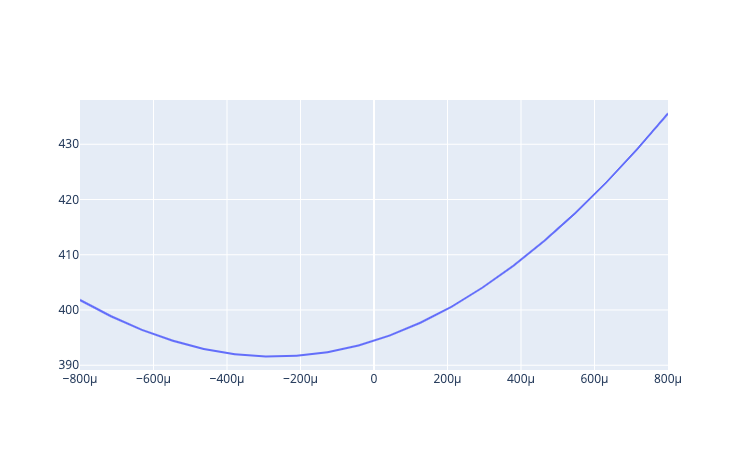

In [64]:
import plotly.graph_objects as go

scatter = go.Scatter(x = params, y = costs)
go.Figure(scatter)

In [74]:
import numpy as np
np.log(100)

4.605170185988092

<img src="./cost-function-descent.png" width="40%" >

So this the loss function we use for logistic regression.  The process of fitting our line now just uses gradient descent - like we saw in linear regression.  That is we try different parameters for our hypothesis function, input them into our logistic cost function, and choose the hypothesis function that minimizes our cost function.

And of course this does not just happen for one parameter, but across multiple parameters simultaneously.

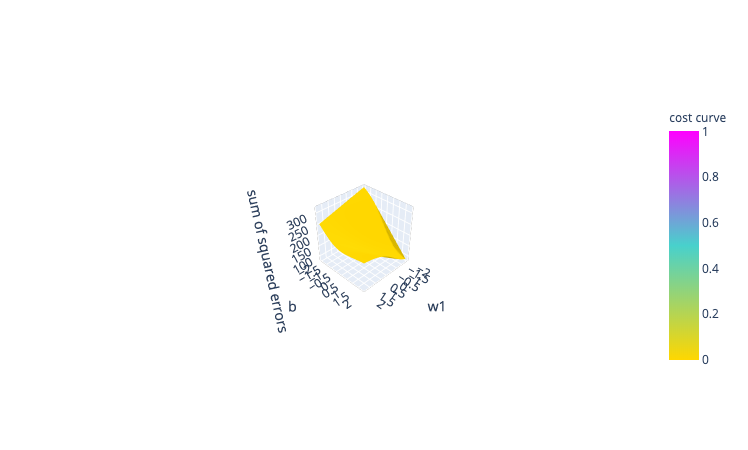

In [69]:
import pandas as pd
import plotly.graph_objects as go
url = "https://storage.googleapis.com/curriculum-assets/nn-from-scratch/cost_curve_three_d.json"
import requests
response = requests.get(url)
# pd.read_json(url, typ = 'dict')
go.Figure(response.json())

### Summary

In this lesson, we explored the cost function for the logistic regression function.  We saw that logistic regression function trains it parameters by using the log loss function, and that the log loss function allocates a large penalty for predictions that are confident and incorrect.  It does so  by using the $log(x)$, which returns approaches negative infinity when x equals 0.  The log loss function looks like the following:

$J(X) = - \sum y_ilog(p) +  (1-y_i) log (1 - p)  $ 

In [ ]:
y_1 =1, p(.01) -> log(.01) -> +8
y_2 =0, p(.02) -> log(.01) -> .50
y_3 =1, p(.8) -> log(.8) -> 1.6



It's written to switch on the first term where $y = 1$, and the second term where $y = 0$.

Then we saw how we can find the parameters that minimize the cost function by using gradient descent.  We tried different parameters for our mean area feature.  But as displayed above, the logistic regression algorithm uses gradient descent to find the parameters that minimizes the cost function across multliple features simultaneously. 

### Resources

[logistic regression cost](https://www.internalpointers.com/post/cost-function-logistic-regression)